In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

648

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f8ff5a7b9b54f6a75cd2763a4c76693a


In [8]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f8ff5a7b9b54f6a75cd2763a4c76693a&q=Boston


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jacareacanga
Processing Record 2 of Set 1 | lata
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | villa maria
Processing Record 6 of Set 1 | abbeville
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | mayo
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | wanning
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | koscian
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | aswan
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Recor

Processing Record 38 of Set 4 | garden city
Processing Record 39 of Set 4 | abrau-dyurso
Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | kalamazoo
Processing Record 44 of Set 4 | tautira
Processing Record 45 of Set 4 | sussex
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | payson
Processing Record 48 of Set 4 | candawaga
City not found. Skipping...
Processing Record 49 of Set 4 | yellowknife
Processing Record 50 of Set 4 | leningradskiy
Processing Record 1 of Set 5 | avarua
Processing Record 2 of Set 5 | lavumisa
Processing Record 3 of Set 5 | angoche
Processing Record 4 of Set 5 | tezu
Processing Record 5 of Set 5 | xingcheng
Processing Record 6 of Set 5 | bone
Processing Record 7 of Set 5 | berlevag
Processing Record 8 of Set 5 | sfantu gheorghe
Processing Record 9 of Set 5 | macenta
Processing Record 10 of Set 5 | necochea
Proce

Processing Record 28 of Set 8 | thongwa
Processing Record 29 of Set 8 | amos
Processing Record 30 of Set 8 | kabinda
Processing Record 31 of Set 8 | huarmey
Processing Record 32 of Set 8 | quelimane
Processing Record 33 of Set 8 | katangli
Processing Record 34 of Set 8 | praia
Processing Record 35 of Set 8 | skegness
Processing Record 36 of Set 8 | talnakh
Processing Record 37 of Set 8 | haines junction
Processing Record 38 of Set 8 | ternate
Processing Record 39 of Set 8 | churapcha
Processing Record 40 of Set 8 | kimberley
Processing Record 41 of Set 8 | teya
Processing Record 42 of Set 8 | weyburn
Processing Record 43 of Set 8 | buala
Processing Record 44 of Set 8 | bodden town
Processing Record 45 of Set 8 | namibe
Processing Record 46 of Set 8 | khonuu
City not found. Skipping...
Processing Record 47 of Set 8 | egvekinot
Processing Record 48 of Set 8 | inirida
Processing Record 49 of Set 8 | iquique
Processing Record 50 of Set 8 | selenduma
Processing Record 1 of Set 9 | balabac
P

City not found. Skipping...
Processing Record 14 of Set 12 | joensuu
Processing Record 15 of Set 12 | nyurba
Processing Record 16 of Set 12 | smithers
Processing Record 17 of Set 12 | perigueux
Processing Record 18 of Set 12 | kielce
Processing Record 19 of Set 12 | rawson
Processing Record 20 of Set 12 | kutum
Processing Record 21 of Set 12 | antequera
Processing Record 22 of Set 12 | deputatskiy
Processing Record 23 of Set 12 | igarape-miri
City not found. Skipping...
Processing Record 24 of Set 12 | puerto carreno
Processing Record 25 of Set 12 | cockburn town
Processing Record 26 of Set 12 | nazareno
Processing Record 27 of Set 12 | nishihara
Processing Record 28 of Set 12 | beloha
Processing Record 29 of Set 12 | borogontsy
Processing Record 30 of Set 12 | wazzan
City not found. Skipping...
Processing Record 31 of Set 12 | binga
Processing Record 32 of Set 12 | borovskoy
Processing Record 33 of Set 12 | ausa
Processing Record 34 of Set 12 | hope
Processing Record 35 of Set 12 | tu

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jacareacanga,-6.2222,-57.7528,82.47,69,100,5.44,BR,2022-02-09 16:53:58
1,Lata,40.1629,-8.3327,67.91,48,0,3.20,PT,2022-02-09 16:53:58
2,Puerto Ayora,-0.7393,-90.3518,80.56,71,36,9.48,EC,2022-02-09 16:53:59
3,Punta Arenas,-53.1500,-70.9167,53.71,47,40,35.68,CL,2022-02-09 16:53:48
4,Villa Maria,-32.4075,-63.2402,92.50,21,13,12.12,AR,2022-02-09 16:54:00
5,Abbeville,50.1000,1.8333,50.49,77,78,3.98,FR,2022-02-09 16:54:00
6,Barrow,71.2906,-156.7887,-29.83,99,8,11.18,US,2022-02-09 16:54:00
7,Saint-Philippe,-21.3585,55.7679,78.39,79,98,8.39,RE,2022-02-09 16:54:01
8,Hilo,19.7297,-155.0900,66.79,98,94,3.00,US,2022-02-09 16:54:01
9,Mayo,38.8876,-76.5119,52.95,64,0,10.00,US,2022-02-09 16:54:02


In [12]:
city_data_df = city_data_df [['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
print(city_data_df)

             City Country                 Date      Lat       Lng  Max Temp  \
0    Jacareacanga      BR  2022-02-09 16:53:58  -6.2222  -57.7528     82.47   
1            Lata      PT  2022-02-09 16:53:58  40.1629   -8.3327     67.91   
2    Puerto Ayora      EC  2022-02-09 16:53:59  -0.7393  -90.3518     80.56   
3    Punta Arenas      CL  2022-02-09 16:53:48 -53.1500  -70.9167     53.71   
4     Villa Maria      AR  2022-02-09 16:54:00 -32.4075  -63.2402     92.50   
..            ...     ...                  ...      ...       ...       ...   
587   Gravelbourg      CA  2022-02-09 17:10:18  49.8834 -106.5512     30.00   
588       Vizinga      RU  2022-02-09 17:10:19  61.0749   50.1031     18.70   
589         Bumba      CD  2022-02-09 17:10:19   2.1833   22.4667     82.85   
590        Eureka      US  2022-02-09 17:10:20  40.8021 -124.1637     65.01   
591        Matane      CA  2022-02-09 17:10:20  48.8286  -67.5220     28.18   

     Humidity  Cloudiness  Wind Speed  
0          

In [13]:
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jacareacanga,BR,2022-02-09 16:53:58,-6.2222,-57.7528,82.47,69,100,5.44
1,Lata,PT,2022-02-09 16:53:58,40.1629,-8.3327,67.91,48,0,3.20
2,Puerto Ayora,EC,2022-02-09 16:53:59,-0.7393,-90.3518,80.56,71,36,9.48
3,Punta Arenas,CL,2022-02-09 16:53:48,-53.1500,-70.9167,53.71,47,40,35.68
4,Villa Maria,AR,2022-02-09 16:54:00,-32.4075,-63.2402,92.50,21,13,12.12
5,Abbeville,FR,2022-02-09 16:54:00,50.1000,1.8333,50.49,77,78,3.98
6,Barrow,US,2022-02-09 16:54:00,71.2906,-156.7887,-29.83,99,8,11.18
7,Saint-Philippe,RE,2022-02-09 16:54:01,-21.3585,55.7679,78.39,79,98,8.39
8,Hilo,US,2022-02-09 16:54:01,19.7297,-155.0900,66.79,98,94,3.00
9,Mayo,US,2022-02-09 16:54:02,38.8876,-76.5119,52.95,64,0,10.00


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

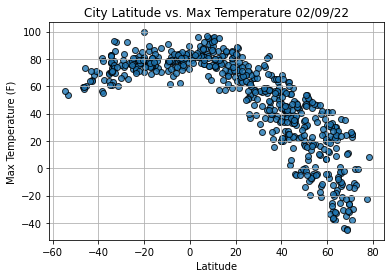

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

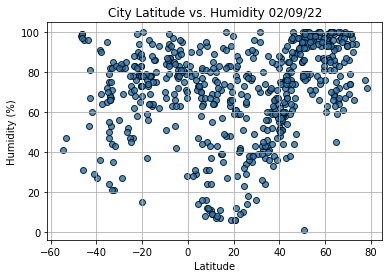

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

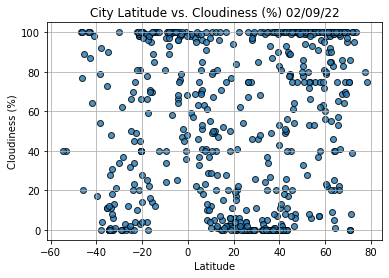

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

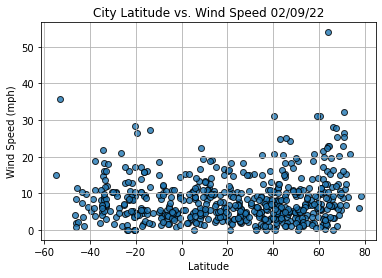

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()